In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import sys

In [3]:
data_loc = "D:/Timing/PulseBlaster"
fname = 'PulseBlaster_triggering_testing.hdf5'

In [33]:
waveforms = []
with h5py.File(data_loc + "/" + fname, "r") as f:
    for grp in list(f.values()):
        for dset in list(grp.values()):
            waveforms.append(dset.value)
waveforms = np.array(waveforms)

In [56]:
attrs = []
with h5py.File(data_loc + "/" + fname, "r") as f:
    for grp in list(f.values()):
        attrs.append(dict(grp.attrs.items()))

In [57]:
print(attrs[0])

{'trig_level': 0.85, 'trig_slope': 'NEG', 'CHAN1_bandwidth': 'OFF', 'CHAN1_impedance': 'OMEG', 'CHAN1_coupling': 'DC', 'CHAN4_bandwidth': 'OFF', 'CHAN4_impedance': 'FIFT', 'CHAN4_coupling': 'DC', 'nr_averages': 1, 'x_increment': '5.000000e-11', 'x_origin': '-5.000000e-09', 'y_increment': '1.562500e-02', 'y_origin': 31, 'ch_desc': "{'CH1': 'FS740 trigger source', 'CH4': 'PulseBlaster output'}", 'desc': 'Testing PulseBlaster trigger behaviour.\n Triggering from FS740 with a 50Hz signal.\n                    PulseBlaster WAIT is 15ns, Pulse is 1us wide.'}


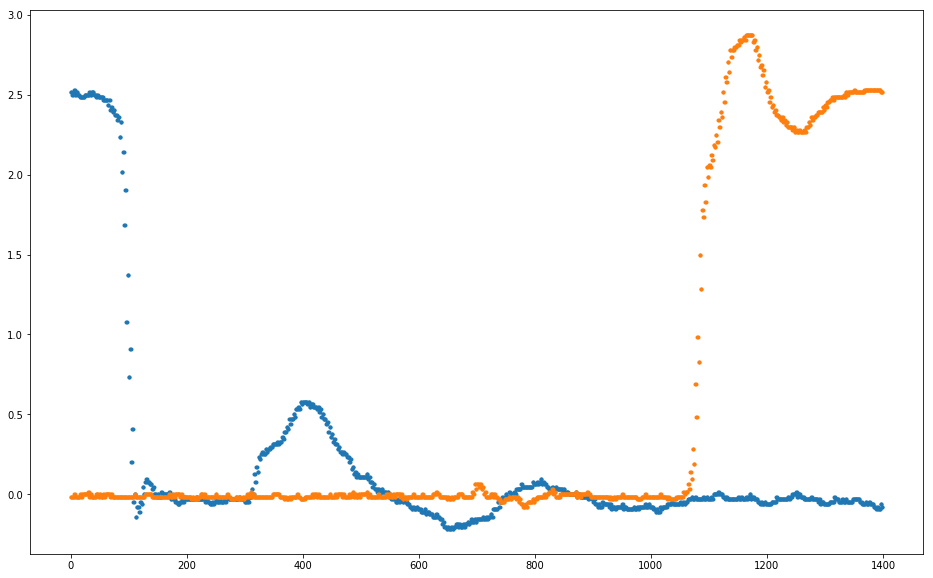

In [75]:
fig, ax = plt.subplots(figsize = (16,10))
for w in waveforms[:1]:
    ax.plot((w.astype(np.int16)-int(attrs[0]['y_origin']))*float(attrs[0]['y_increment']), '.');

In [81]:
waveforms[0][100]

array([78, 30], dtype=uint8)